In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import genfromtxt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [3]:
import pandas as pd

df1 = pd.read_excel('immersed-membrane-bioreactor-evaluation.xlsx',
                    header=0,
                    index_col=False,
                    keep_default_na=True
                   )
df1

,Date,Influent BOD5,Influent TSS,Influent NH3,temperature,Influent pH,Influent Alkalinity,Effluent BOD5,Effluent TSS,Effluent NH3,Aerobic NOx,Effluent pH,Field MLSS,Anoxic tank DO,Aerobic NH3,Aerobic DO
0,2021-02-25,159,76,3.350000,18.00,7.50,356,10.000000,4.000000,1.200000,6.600000,7.0,2100.000000,0.510000,8.00,0.150000
1,2021-02-26,99,350,3.630000,19.00,7.10,185,5.000000,3.000000,1.100000,6.000000,6.9,12000.000000,0.500000,11.90,1.300000
2,2021-02-27,221,216,3.310000,20.00,7.00,180,2.000000,1.000000,1.000000,5.500000,6.9,7800.000000,0.550000,3.30,2.000000
3,2021-02-28,450,300,3.470000,19.00,7.10,200,2.000000,3.000000,0.300000,4.400000,6.7,9000.000000,0.260000,3.40,2.040000
4,2021-03-01,200,74,3.540000,20.00,6.90,100,2.000000,1.000000,0.300000,4.600000,6.9,7800.000000,0.210000,7.80,1.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2021-07-06,394,238,3.244286,32.75,6.80,279,4.020408,2.492147,0.029764,8.302127,6.5,10239.477222,0.432910,7.70,1.932910
132,2021-07-07,395,348,3.228571,32.90,6.77,285,4.114583,3.569231,0.032286,8.394286,6.6,7807.257411,0.184636,8.95,2.384636
133,2021-07-08,399,296,3.212857,31.00,6.90,291,4.438265,3.020000,0.032453,7.871500,6.6,6585.127212,0.046280,10.20,2.296280
134,2021-07-09,409,302,3.197143,31.00,6.90,300,4.595506,3.050505,0.031655,7.737086,6.7,6055.274843,0.007257,11.45,2.327257


In [4]:
y = df1.pop('Effluent BOD5')

In [5]:
y = y.fillna(y.mean())
y.isnull(), y, y.shape

(0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 131    False
 132    False
 133    False
 134    False
 135    False
 Name: Effluent BOD5, Length: 136, dtype: bool,
 0      10.000000
 1       5.000000
 2       2.000000
 3       2.000000
 4       2.000000
          ...    
 131     4.020408
 132     4.114583
 133     4.438265
 134     4.595506
 135     4.621053
 Name: Effluent BOD5, Length: 136, dtype: float64,
 (136,))

In [6]:
X = df1.iloc[:, 1:]
X.fillna(X.mean(), inplace=True)
X.isnull(), X, X.shape


(     Influent BOD5  Influent TSS  Influent NH3  temperature  Influent pH     \
 0            False         False         False        False           False   
 1            False         False         False        False           False   
 2            False         False         False        False           False   
 3            False         False         False        False           False   
 4            False         False         False        False           False   
 ..             ...           ...           ...          ...             ...   
 131          False         False         False        False           False   
 132          False         False         False        False           False   
 133          False         False         False        False           False   
 134          False         False         False        False           False   
 135          False         False         False        False           False   
 
      Influent Alkalinity   Effluent T

In [8]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train, y_train

(     Influent BOD5  Influent TSS  Influent NH3  temperature  Influent pH     \
 39             400           344      3.950000        21.00        7.000000   
 78             420           189      3.750000        41.00        7.500000   
 6              350            90      3.180000        17.50        6.800000   
 85             357           350      3.510000        46.00        6.500000   
 119            280           274      3.432857        38.00        5.550000   
 ..             ...           ...           ...          ...             ...   
 63             300           168      3.250000        33.00        6.371741   
 70             450           337      3.680000        34.11        7.119192   
 81             574           319      3.770000        45.00        7.100000   
 11             430           350      3.530000        18.88        7.000000   
 95             444           123      3.480000        39.50        7.200000   
 
      Influent Alkalinity   Effluent T

In [9]:
y_train.shape, X_train.shape

((95,), (95, 14))

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lm = LinearRegression()

In [12]:
lm.fit(X_train, y_train)

LinearRegression()

In [13]:
lm.coef_

array([ 6.40967067e-03, -6.96419507e-04, -2.13111027e-02, -6.06353884e-02,
       -5.20526486e-01,  1.41063050e-03,  1.29150071e-01,  2.46845602e+00,
        1.68026728e-01,  1.33694965e-01, -1.24980446e-04, -5.21451721e-01,
       -4.08226721e-02, -1.05419999e-01])

In [14]:
prediction = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

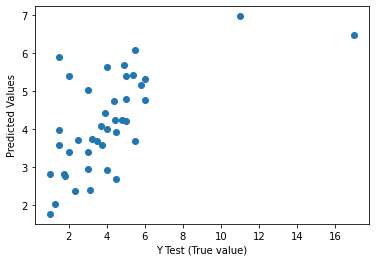

In [15]:
import matplotlib.pyplot as plt

plt.scatter(y_test, prediction)
plt.xlabel('Y Test (True value)')
plt.ylabel('Predicted Values')

In [16]:
from sklearn import metrics

print('MAE :', metrics.mean_absolute_error(y_test, prediction))
print('MSE :', metrics.mean_squared_error(y_test, prediction))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, prediction)))



MAE : 1.3008539949389228
MSE : 4.863682216040779
RMSE : 2.205375753934186
